<a href="https://colab.research.google.com/github/hamim23z/CSc47400/blob/main/CSC47400_HW1_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [158]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import os

In [159]:
#file path. just uploaded it on my google drive and then renamed it to get rid of whitespace
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Datasets/USFoods_AppendixB.xls"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
#checking and returning all sheetnames. we only care about FAH files
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['94-98 FAH', '94-98 FAFH', '03-04 FAH', '03-04 FAFH', '05-06 FAH', '05-06 FAFH', '07-08 FAH', '07-08 FAFH']


In [161]:
#focusing on the time periods as listed on the problem1 description
time_periods = {
    "1994-98": "94-98 FAH",
    "2003-04": "03-04 FAH",
    "2005-06": "05-06 FAH",
    "2007-08": "07-08 FAH"
}

In [162]:
#extracting datafunction
def extract_data(sheet_name, gender="Men"):
    df = pd.read_excel(file_path, sheet_name=sheet_name, header=None)

    col = 7 if gender == "Men" else 10
    df = df.iloc[70:130, [0, col]].dropna()
    df.columns = ["Product", gender]
    df["Product"] = df["Product"].astype(str).str.strip()
    df = df.set_index("Product")
    return df

#checking the data for each timeframe
men_data = pd.DataFrame({
    tp: extract_data(sheet, "Men")["Men"]
    for tp, sheet in time_periods.items()
})

women_data = pd.DataFrame({
    tp: extract_data(sheet, "Women")["Women"]
    for tp, sheet in time_periods.items()
})

print("Men Data (sample):")
print(men_data.head(15))
print("\nWomen Data (sample):")
print(women_data.head(15))

Men Data (sample):
                   1994-98 2003-04 2005-06 2007-08
Product                                           
Total fruit           86.2   85.97   87.58    87.2
Apples, Total        89.01   90.02   91.33   92.81
Apples as fruit      89.18   90.86    89.7   93.35
Apple juice          88.78   88.91      93   92.13
Bananas              95.42   94.85   95.59   93.96
Berries              84.21   88.57   91.83    90.7
Grapes               88.79   88.55   93.65   92.16
Melons               80.74   79.72   80.85   84.97
Oranges, Total       85.66   84.46      86   84.16
Oranges as fruit     92.31   94.62   94.49   92.17
Orange juice         85.15   83.92   85.52   83.49
Other citrus fruit   79.82   73.74   72.95    61.9
Stone fruit          88.95   94.02   93.05   95.89
Tropical fruit       74.61   74.58   76.94   84.68
Vegetables, Total    62.44   59.68   60.02   62.01

Women Data (sample):
                   1994-98 2003-04 2005-06 2007-08
Product                                  

In [163]:
#focusing on the fruit and dairy products. listed on the problem 1 description
fruit_products = [
    "Apples as fruit", "Bananas", "Berries", "Grapes", "Melons",
    "Oranges, Total", "Other citrus fruit", "Stone fruit", "Tropical fruit"
]

dairy_products = [
    "Fluid milk, Total", "Butter", "Cheese", "Yogurt", "Dairy, Other"
]

men_fruit = men_data.loc[fruit_products]
men_dairy = men_data.loc[dairy_products]
women_fruit = women_data.loc[fruit_products]
women_dairy = women_data.loc[dairy_products]

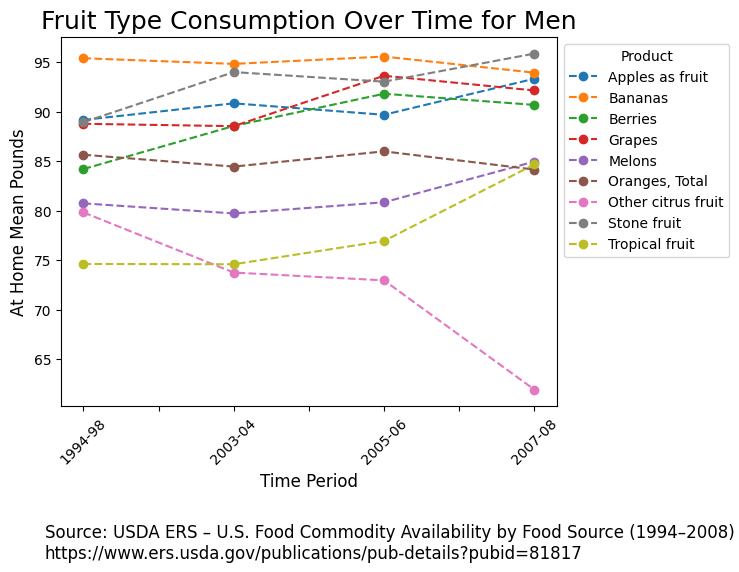

In [164]:
#setting up the plot components (labels, titles, captions)
def plot_products(df, title, ylabel):
    ax = df.T.plot(marker="o", linestyle="--")
    ax.set_title(title, fontsize=18)
    ax.set_xlabel("Time Period", fontsize=12)
    print("\n\n")

    #this was hard, i didnt know how to do this. used chatgpt here
    ax.set_ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Product", bbox_to_anchor=(1, 1), loc="upper left")

    plt.figtext(
        0.1, -0.2,
        "Source: USDA ERS – U.S. Food Commodity Availability by Food Source (1994–2008)\n"
        "https://www.ers.usda.gov/publications/pub-details?pubid=81817",
        wrap=True, ha="left", fontsize=12
    )
    #end of chatgpt
    plt.show()

plot_products(men_fruit, "Fruit Type Consumption Over Time for Men", "At Home Mean Pounds")
print("\n\n")

This is the Fruit Type Consumption over Time for Men chart. Fruit consumption did change over time for men. It shows that men typically eat fruits that are easy to consume and do not waste time (excessive peeling, having to cut).  This figure shows that men consumed a lot of fruit at home. Bananas, stone fruit, and apples were the most frequently foods eaten at home. Citrus fruit showed a sharp decline over time. One of the most consistent fruit are grapes.

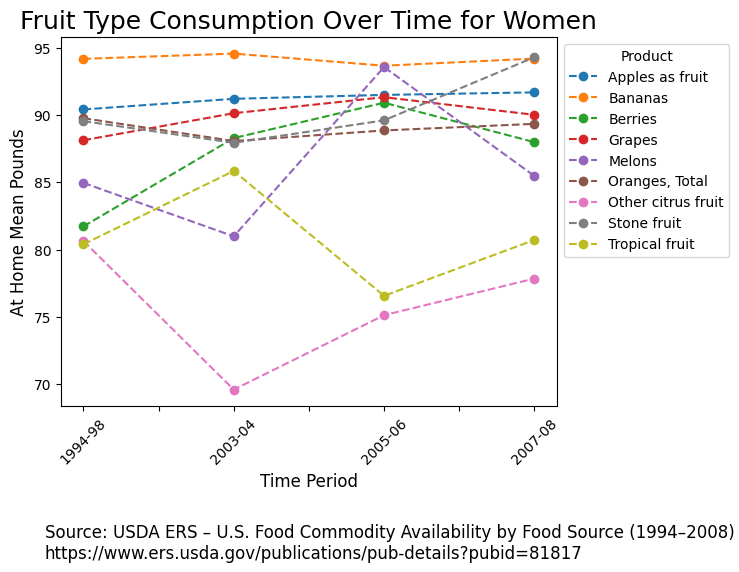

In [165]:
plot_products(women_fruit, "Fruit Type Consumption Over Time for Women", "At Home Mean Pounds")
print("\n\n")

This is the Fruit Type Consumption over Time for Women chart. This is a very sporadic chart. Most likely because of women pregnancy and how their cravings change during that time. Certain fruits are more common while others are not. Bananas and apples were the most common fruit again. The variation may reflect changing preferences and availability of fruit, with some fruits being super popular and then declining at a later time.

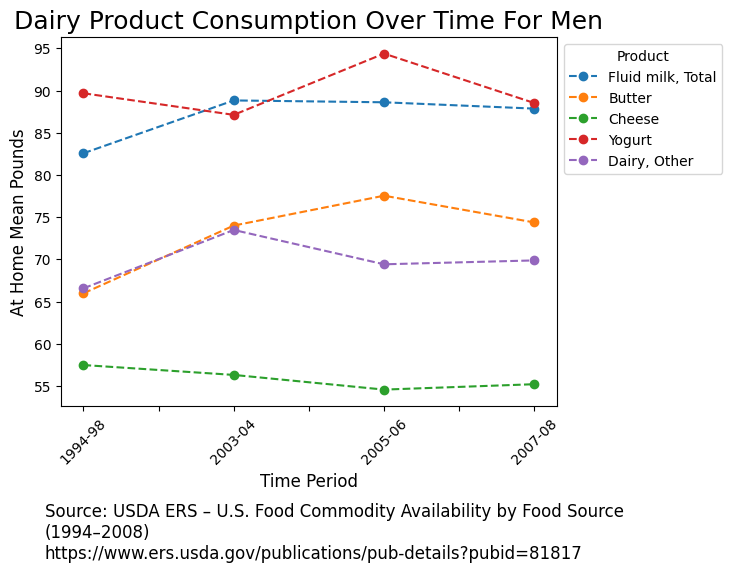

In [166]:
plot_products(men_dairy, "Dairy Product Consumption Over Time For Men", "At Home Mean Pounds")
print("\n\n")

This is the Dairy Product Consumption Over Time For Men chart. Dairy was led by fluid milk the most as it was the most consistent throughhout. Although it did decline over time, it seemed to barely decline. Yogurt had spurts of growth and then decline, being strong but not quite. Cheese is surprisingly low and now the best choice. Dairy products can cause acne to some men which is why prefrences may vary.

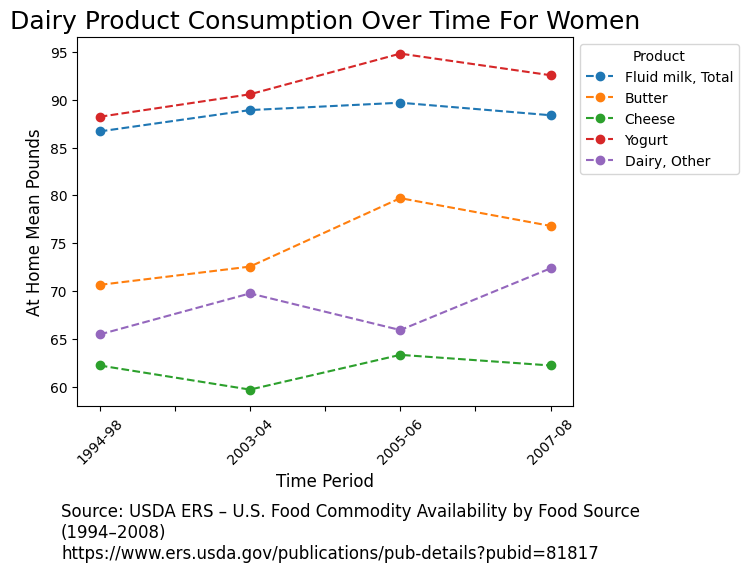

In [167]:
plot_products(women_dairy, "Dairy Product Consumption Over Time For Women", "At Home Mean Pounds")

This is the Dairy Product Consumption Over Time For Women chart. Here the most consistent product was Yogurt followed by Fluid Milk. Cheese again, similiar to men, was less consumed; probably because of the same reason as men. The trend follows easy to consume and eat foods that does not take extra time (unpacking, taking too long to eat, etc).